In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from functools import reduce  
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from auxiliary_files.auxiliary_analysis import * 
from auxiliary_files.auxiliary_plots import * 

# High Dimensionality, No Multicollinearity. 

Decreasing sparsity. We expect lasso to initially do better first. As sparsity declines ridge will begin doing better. 

In [18]:
non_zero_betas = [5, 10, 20, 30, 35]
zero_betas = [30, 25, 15, 5, 0]
size_non_zero = 2

true_betas_list = generate_true_betas(non_zero_betas, zero_betas, size_non_zero)


In [4]:
np.random.seed(900)

n = 30
p = 35
cor_factor = 0 # we have not introduced multicollinearity yet. 
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in true_betas_list: 
        
    y_test, X_test, df_test= get_sim_data(n, p, cor_factor, i) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)
    

df_predictions_5 = get_predictions(n, p, true_betas_list[0], cor_factor, iterations, alphas, store_X_test[0])
df_predictions_10 = get_predictions(n, p, true_betas_list[1], cor_factor, iterations, alphas, store_X_test[1])
df_predictions_20 = get_predictions(n, p, true_betas_list[2], cor_factor, iterations, alphas, store_X_test[2])
df_predictions_30 = get_predictions(n, p, true_betas_list[3], cor_factor, iterations, alphas, store_X_test[3])
df_predictions_35 = get_predictions(n, p, true_betas_list[4], cor_factor, iterations, alphas, store_X_test[4])


In [6]:
store_mse_lists_5, store_variance_lists_5, store_bias_sq_lists_5 = compute_mse(df_predictions_5, store_y_test[0], iterations)
store_mse_lists_10, store_variance_lists_10, store_bias_sq_lists_10 = compute_mse(df_predictions_10, store_y_test[1], iterations)
store_mse_lists_20, store_variance_lists_20, store_bias_sq_lists_20 = compute_mse(df_predictions_20, store_y_test[2], iterations)
store_mse_lists_30, store_variance_lists_30, store_bias_sq_lists_30 = compute_mse(df_predictions_30, store_y_test[3], iterations)
store_mse_lists_35, store_variance_lists_35, store_bias_sq_lists_35 = compute_mse(df_predictions_35, store_y_test[4], iterations)

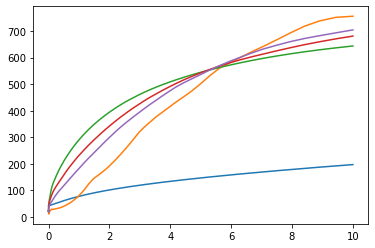

In [11]:
for i in store_mse_lists_10:

    ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
    mse = ax.plot(alphas, i)
#bias = ax.plot(alphas, store_bias_sq)
#ax.legend(["variance","mse","bias"])

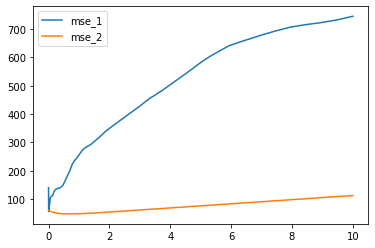

In [8]:
ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
mse_1 = ax.plot(alphas, store_mse_lists_20[1])
mse_2 = ax.plot(alphas, store_mse_lists_20[0])
#var = ax.plot(alphas, store_variance_lists_20[1])
#bias = ax.plot(alphas, store_bias_sq_lists_20[1])
ax.legend(["mse_1","mse_2"])


In [9]:
# lasso does best, which is what we expect!

for i in store_mse_lists_5: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))


13.725647507243485 10.0 199
0.5489902050521569 0.29331662783900453 138
3.7878320444008224 10.0 199
3.2090178450955142 7.067181273927491 193
1.914506414891349 0.00860346441668451 77


In [12]:
# lasso does best, which is what we expect!

for i in store_mse_lists_10: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))



42.61882235610139 0.0001 0
11.672227170054462 0.016257556664437952 88
20.15674177825752 0.00022478058335487252 14
19.34506848619084 0.0003001835813575589 19
18.38779637197828 0.0003180625692794119 20


In [13]:
# lasso starts doing not so well as sparsity decreases. Here, one of the elastic net models would be best. 

for i in store_mse_lists_20: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))



47.997272812160176 0.698587974678525 153
56.103960996626846 0.004055460735840828 64
50.88812400110342 0.02736439997074672 97
58.211049647875214 0.03654383070957258 102
64.56569083519904 0.03654383070957258 102


In [14]:
# lasso starts doing not so well as sparsity decreases. Here, one of the elastic net models would be best. 

for i in store_mse_lists_30: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))



96.39316046755138 10.0 199
131.71392481194488 0.0006368249944718586 32
96.03548336058701 0.698587974678525 153
111.80868873260621 0.8804883581643465 157
122.48022890840245 0.0004008806328898465 24


In [15]:
# ridge does best as we would expect!

for i in store_mse_lists_35: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))




157.22416612218444 0.0001 0
134.91199100350528 0.0006368249944718586 32
114.13319442232519 0.00035707859649004625 22
117.34261728719028 0.0004008806328898465 24
120.99699995302367 0.0005672426068491978 30


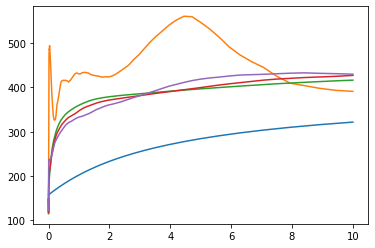

In [17]:
for i in store_mse_lists_35:

    ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
    mse = ax.plot(alphas, i)
#bias = ax.plot(alphas, store_bias_sq)
#ax.legend(["variance","mse","bias"])

# Low Dimensionality, Moderate to High Multicollineary 

Only consider lasso and ridge here. Elastic net does not perform best in any of the below cases for low dimensionality and high multicollinearity. 

In [19]:
non_zero_betas_2 = [2, 5, 10]
zero_betas_2 = [8, 5, 0]
size_non_zero = 2

true_betas_list_2 = generate_true_betas(non_zero_betas_2, zero_betas_2, size_non_zero)
true_betas_list_2

[array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]

In [7]:
np.random.seed(900)

n = 30
p = 10
cor_factor = 0.7 
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in true_betas_list_2: 
        
    y_test, X_test, df_test= get_sim_data(n, p, cor_factor, i) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)
    

df_predictions_mc_2 = get_predictions(n, p, true_betas_list_2[0], cor_factor, iterations, alphas, store_X_test[0])
df_predictions_mc_5 = get_predictions(n, p, true_betas_list_2[1], cor_factor, iterations, alphas, store_X_test[1])
df_predictions_mc_10 = get_predictions(n, p, true_betas_list_2[2], cor_factor, iterations, alphas, store_X_test[2])


In [8]:
store_mse_lists_mc_2, store_variance_lists_mc_2, store_bias_sq_lists_mc_2 = compute_mse(df_predictions_mc_2, store_y_test[0], iterations)
store_mse_lists_mc_5, store_variance_lists_mc_5, store_bias_sq_lists_mc_5 = compute_mse(df_predictions_mc_5, store_y_test[1], iterations)
store_mse_lists_mc_10, store_variance_lists_mc_10, store_bias_sq_lists_mc_10 = compute_mse(df_predictions_mc_10, store_y_test[2], iterations)


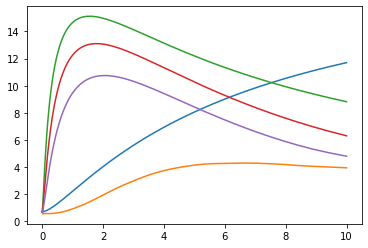

In [9]:
for i in store_mse_lists_mc_2:

    ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
    mse = ax.plot(alphas, i)
#bias = ax.plot(alphas, store_bias_sq)
#ax.legend(["variance","mse","bias"])

In [10]:
# lasso does best as we would expect!

for i in store_mse_lists_mc_2: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.6763328706409073
0.5335685689313427
0.6769240560736602
0.6758001955927773
0.6641698513621548


In [11]:
# lasso still does well here. 

for i in store_mse_lists_mc_5: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.5339583062329145
0.18067925556621572
0.346618239521459
0.3730478574158615
0.40945692920582016


In [12]:
# ridge does best here, as we would expect! 

for i in store_mse_lists_mc_10: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.2696841327573715
0.7837146029853316
0.284009441474547
0.32450173225971407
0.3886809575019659


# High Dimensionality, Moderate to High Multicollinearity 


In [24]:
np.random.seed(900)

n = 30
p = 35
q = 0
min_cor = 0.40  
max_cor = 0.80
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in true_betas_list: 
        
    y_test, X_test, df_test= get_sim_data(n, p, q, min_cor, max_cor, i) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)
    

df_predictions_hd_mc_5 = get_predictions(n, p, q, min_cor, max_cor, true_betas_list[0], iterations, alphas, store_X_test[0])
df_predictions_hd_mc_10 = get_predictions(n, p, q, min_cor, max_cor, true_betas_list[1], iterations, alphas, store_X_test[1])
df_predictions_hd_mc_20 = get_predictions(n, p, q, min_cor, max_cor, true_betas_list[2], iterations, alphas, store_X_test[2])
df_predictions_hd_mc_30 = get_predictions(n, p, q, min_cor, max_cor, true_betas_list[3], iterations, alphas, store_X_test[3])
df_predictions_hd_mc_35 = get_predictions(n, p, q, min_cor, max_cor, true_betas_list[4], iterations, alphas, store_X_test[4])




In [25]:
store_mse_lists_hd_mc_5, store_variance_lists_hd_mc_5, store_bias_sq_lists_hd_mc_5 = compute_mse(df_predictions_hd_mc_5, store_y_test[0])
store_mse_lists_hd_mc_10, store_variance_lists_hd_mc_10, store_bias_sq_lists_hd_mc_10 = compute_mse(df_predictions_hd_mc_10, store_y_test[1])
store_mse_lists_hd_mc_20, store_variance_lists_hd_mc_20, store_bias_sq_lists_hd_mc_20 = compute_mse(df_predictions_hd_mc_20, store_y_test[2])
store_mse_lists_hd_mc_30, store_variance_lists_hd_mc_30, store_bias_sq_lists_hd_mc_30 = compute_mse(df_predictions_hd_mc_30, store_y_test[3])
store_mse_lists_hd_mc_35, store_variance_lists_hd_mc_35, store_bias_sq_lists_hd_mc_35 = compute_mse(df_predictions_hd_mc_35, store_y_test[4])

In [26]:
# Lasso does best, as expected given the presence of high sparsity.

for i in store_mse_lists_hd_mc_5: 
    
    print(min(i))

20.74978198091433
5.01488643619309
12.613200560731046
12.20543238554771
9.66666653077193


In [27]:
# Lasso still doing best given high sparsity. 

for i in store_mse_lists_hd_mc_10: 
    
    print(min(i))

20.886642270492608
2.243522214690988
15.751620679850237
13.951468920642673
8.552970610831492


In [28]:
# With lower levels of sparsity, lasso outperformed by elastic net with ratio 0f 0.70. 

for i in store_mse_lists_hd_mc_20: 
    
    print(min(i))

26.61969065920452
30.20008363021399
25.62920464645905
23.44771627521411
21.752699512284977


In [29]:
# For decreasing sparsity, we see how lasso struggles compared with the other models. Elastic net with ratio of 0.20
# does best. We see here how a combination of ridge and lasso constraints provide higher prediction accuracy in the 
# presence of multicollinearity and high dimensionality. 

for i in store_mse_lists_hd_mc_30: 
    
    print(min(i))

30.74547393455749
128.30014351758945
16.796438164548643
21.409799822626034
31.303672610456598


In [30]:
# Lasso really struggles while ridge provides the lowest MSE and all elastic net models perform comparatively 
# well compared to ridge. 

for i in store_mse_lists_hd_mc_35: 
    
    print(min(i))

3.3909708811542356
168.6756454715113
3.60445946336617
4.253563019195883
5.551047308345918


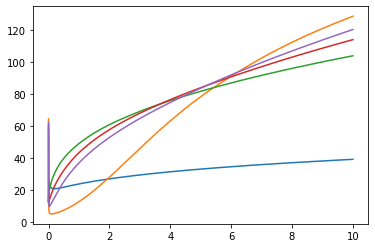

In [31]:
for i in store_mse_lists_hd_mc_5:

    ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
    mse = ax.plot(alphas, i)

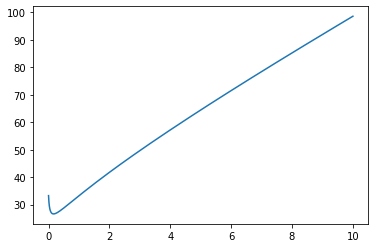

In [32]:
ax = plt.subplot(1,1,1)
#variance = ax.plot(alphas, store_variance)
mse = ax.plot(alphas, store_mse_lists_hd_mc_20[0])

# Edo and Carolina

In [91]:
np.random.seed(900)

n = 200
p = 10
min_cor = 0  # we have not included multicollinearity in our analysis yet.
max_cor = 0 
true_betas = np.repeat(5, p) 
iterations = 50

#y_true, y_noise, X, df= get_sim_data(p, n, min_cor, max_cor, true_betas) # getting the whole dataset
alphas = np.array([0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90,
                  100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 300, 400, 500, 600])
 

store_predictions_list = []

for i in range(iterations):
    
    store_predictions = []
    y_true, y_noise, X, df= get_sim_data(p, n, min_cor, max_cor, true_betas)
    X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.2, random_state=1000) # get test data 

    for a in alphas: 

        ridge = Ridge(alpha=a).fit(X_train, y_train)
        ridge_predict = ridge.predict(X_test)
        ridge_predict_select = ridge_predict[17]
        store_predictions.append(ridge_predict_select) 
    
    store_predictions_list.append(store_predictions)
        
store_predictions_df = pd.DataFrame(store_predictions_list)
    
    

store_predictions_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,7.629869,7.629858,7.629760,7.628775,7.618944,7.608044,7.575493,7.553916,7.532438,7.521736,...,1.889872,1.773390,1.667526,1.570992,1.482695,1.401696,0.858908,0.575549,0.406992,0.297585
1,-21.516466,-21.516451,-21.516316,-21.514963,-21.501445,-21.486447,-21.441584,-21.411785,-21.382074,-21.367252,...,-10.730219,-10.393565,-10.078308,-9.782453,-9.504243,-9.242133,-7.266704,-6.012446,-5.144488,-4.507863
2,20.676138,20.676132,20.676078,20.675536,20.670114,20.664091,20.646030,20.633997,20.621969,20.615957,...,13.926955,13.618982,13.323932,13.041070,12.769709,12.509206,10.386433,8.881254,7.761593,6.897260
3,7.356998,7.356993,7.356951,7.356523,7.352255,7.347517,7.333340,7.323919,7.314522,7.309832,...,3.670711,3.545933,3.428519,3.317830,3.213300,3.114424,2.356835,1.864383,1.518382,1.261884
4,-5.969915,-5.969908,-5.969841,-5.969176,-5.962530,-5.955160,-5.933137,-5.918527,-5.903975,-5.896721,...,-1.828748,-1.744939,-1.669480,-1.601368,-1.539745,-1.483870,-1.134023,-0.981375,-0.909710,-0.875701
5,-9.358015,-9.358009,-9.357960,-9.357471,-9.352576,-9.347145,-9.330899,-9.320108,-9.309349,-9.303980,...,-5.310871,-5.175483,-5.047908,-4.927461,-4.813539,-4.705607,-3.871603,-3.320874,-2.928787,-2.634988
6,24.394871,24.394862,24.394781,24.393974,24.385907,24.376944,24.350063,24.332148,24.314239,24.305287,...,15.221899,14.855220,14.507607,14.177650,13.864067,13.565692,11.224364,9.651326,8.522279,7.672553
7,21.151819,21.151803,21.151657,21.150199,21.135627,21.119461,21.071115,21.039013,21.007012,20.991050,...,9.926215,9.587090,9.270070,8.973040,8.694149,8.431768,6.465771,5.227849,4.375832,3.753290
8,-5.943786,-5.943783,-5.943754,-5.943469,-5.940615,-5.937445,-5.927942,-5.921614,-5.915290,-5.912131,...,-2.914704,-2.799588,-2.690829,-2.587929,-2.490435,-2.397942,-1.681325,-1.208948,-0.874361,-0.624987
9,-1.148733,-1.148734,-1.148741,-1.148818,-1.149587,-1.150442,-1.153009,-1.154720,-1.156433,-1.157290,...,-2.000025,-2.028931,-2.055803,-2.080821,-2.104151,-2.125937,-2.282355,-2.372258,-2.428930,-2.467157


In [92]:
store_mse = []
store_variance = []
store_bias_sq = []

for i in store_predictions_df.columns:

    mse = np.sum((np.asarray(store_predictions_df.iloc[:,i]) - y_test.iloc[17])**2) / iterations
    variance = np.mean((np.mean(store_predictions_df.iloc[:,i]) - np.asarray(store_predictions_df.iloc[:,i]))**2)
    bias_squared = (np.mean(store_predictions_df.iloc[:,i]) - y_test.iloc[17])**2
    
    store_mse.append(mse)
    store_variance.append(variance)
    store_bias_sq.append(bias_squared)
    
#store_mse

In [82]:
store_mse

[254.78436280175447,
 254.78405869642904,
 254.78132177617073,
 254.75395531271252,
 254.48056432874776,
 254.17737900110725,
 253.2714843584966,
 251.77376022602036,
 248.8229204275258,
 245.93017412801805,
 240.31258894611113,
 227.17955487608108,
 215.21688864060903,
 204.2830991311434,
 185.04058410896556,
 168.68725888086723,
 154.6547409911162,
 142.51183181720626,
 131.92561955743327,
 122.63514420939659,
 114.43310898863007,
 107.15289753129717,
 100.65917878560917,
 94.84099184251278,
 89.60657865868791]

In [83]:
store_variance

[249.67527982042037,
 249.67496918828874,
 249.67217352707812,
 249.6442196841121,
 249.36495790556484,
 249.05525586660474,
 248.12985140031233,
 246.59974482472663,
 243.58463908586052,
 240.62828600018474,
 234.8854353361363,
 221.45025911638865,
 209.20046985008773,
 197.9936912093364,
 178.24424391048052,
 161.43089296353236,
 146.97970892121492,
 134.45464770495778,
 123.51858870306788,
 113.90692351242942,
 105.40919249677881,
 97.8560337071076,
 91.10972772907385,
 85.05723074093311,
 79.60496307234429]

In [84]:
store_bias_sq

[5.109082981334113,
 5.109089508140279,
 5.109148249092642,
 5.10973562860043,
 5.115606423182875,
 5.122123134502498,
 5.141632958184289,
 5.174015401293664,
 5.238281341665303,
 5.301888127833325,
 5.427153609974867,
 5.729295759692413,
 6.016418790521348,
 6.289407921807025,
 6.796340198485084,
 7.256365917334903,
 7.6750320699012775,
 8.05718411224846,
 8.407030854365415,
 8.728220696967158,
 9.023916491851255,
 9.296863824189604,
 9.549451056535286,
 9.783761101579657,
 10.001615586343615]

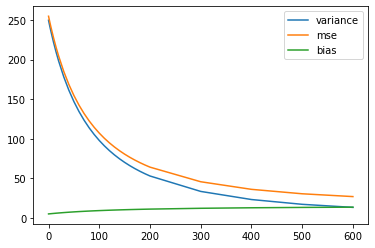

In [93]:
ax = plt.subplot(1,1,1)
variance = ax.plot(alphas, store_variance)
mse = ax.plot(alphas, store_mse)
bias = ax.plot(alphas, store_bias_sq)
ax.legend(["variance","mse","bias"])

In [94]:
np.asarray(store_bias_sq) + np.asarray(store_variance)

array([254.7843628 , 254.7840587 , 254.78132178, 254.75395531,
       254.48056433, 254.177379  , 253.27148436, 252.6705883 ,
       252.07210307, 251.77376023, 248.82292043, 245.93017413,
       240.31258895, 227.17955488, 215.21688864, 204.28309913,
       185.04058411, 168.68725888, 154.65474099, 142.51183182,
       131.92561956, 122.63514421, 114.43310899, 107.15289753,
       100.65917879,  94.84099184,  89.60657866,  84.87947024,
        80.59548579,  76.70040619,  73.14815198,  69.89934309,
        66.92015063,  64.18137428,  45.74001451,  36.15362636,
        30.54756386,  26.99446099])

In [95]:
store_mse

[254.78436280175447,
 254.78405869642904,
 254.78132177617073,
 254.75395531271252,
 254.48056432874776,
 254.17737900110725,
 253.2714843584966,
 252.67058829827195,
 252.07210306804274,
 251.77376022602036,
 248.8229204275258,
 245.93017412801805,
 240.31258894611113,
 227.17955487608108,
 215.21688864060903,
 204.2830991311434,
 185.04058410896556,
 168.68725888086723,
 154.6547409911162,
 142.51183181720626,
 131.92561955743327,
 122.63514420939659,
 114.43310898863007,
 107.15289753129717,
 100.65917878560917,
 94.84099184251278,
 89.60657865868791,
 84.87947024031759,
 80.59548578882273,
 76.70040619132901,
 73.14815198102576,
 69.89934308944261,
 66.92015063339687,
 64.1813742760766,
 45.74001450666923,
 36.153626356879606,
 30.547563856606235,
 26.994460989674607]

In [149]:
np.random.seed(5)

n = 50
p = 45
min_cor = 0  # we have not included multicollinearity in our analysis yet.
max_cor = 0 
true_betas = np.repeat(5, p) 
iterations = 100

#y_true, y_noise, X, df= get_sim_data(p, n, min_cor, max_cor, true_betas) # getting the whole dataset
#alphas = np.array([0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90,
                  #100])
alphas = np.logspace(-2,4,5)

store_predictions_list = []

for i in range(iterations):
    
    store_predictions = []
    y_true, y_noise, X, df= get_sim_data(p, n, min_cor, max_cor, true_betas)
    X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.2, random_state=1000) # get test data 

    for a in alphas: 

        ridge = Ridge(alpha=a).fit(X_train, y_train)
        ridge_predict = ridge.predict(X_test)
        ridge_predict_select = ridge_predict[8]
        store_predictions.append(ridge_predict_select) 
    
    store_predictions_list.append(store_predictions)
        
store_predictions_df = pd.DataFrame(store_predictions_list)
    
    

store_predictions_df

,0,1,2,3,4
0,-62.075190,-61.654233,-48.222980,-10.858354,0.102535
1,40.364995,36.412719,13.661858,-4.042328,-3.309266
2,8.631548,9.592696,13.105364,10.792129,7.451119
3,45.635264,40.909748,26.537828,9.199347,6.644703
4,-13.235210,-12.811209,-19.445092,-3.454516,-0.320613
...,...,...,...,...,...
95,4.512203,5.240249,16.606613,4.514650,-1.179857
96,5.277486,7.810615,20.699757,7.762004,1.183322
97,2.714789,1.667599,6.114161,3.702587,5.221732
98,13.458842,12.796154,-0.591157,-8.830208,-5.150850


In [150]:
store_mse = []
store_variance = []
store_bias_sq = []

for i in store_predictions_df.columns:

    mse = np.sum((np.asarray(store_predictions_df.iloc[:,i]) - y_test.iloc[8])**2) / iterations
    variance = np.mean((np.mean(store_predictions_df.iloc[:,i]) - np.asarray(store_predictions_df.iloc[:,i]))**2)
    bias_squared = (np.mean(store_predictions_df.iloc[:,i]) - y_test.iloc[8])**2
    
    store_mse.append(mse)
    store_variance.append(variance)
    store_bias_sq.append(bias_squared)
    
#store_mse

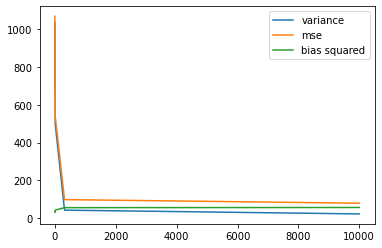

In [151]:
ax = plt.subplot(1,1,1)
variance = ax.plot(alphas, store_variance)
mse = ax.plot(alphas, store_mse)
bias = ax.plot(alphas, store_bias_sq)
ax.legend(["variance","mse","bias squared"])

In [152]:
store_mse

[1069.294561674904,
 988.2069557957312,
 541.7810277140334,
 98.35783787600032,
 79.36774127319835]

# Exercise Ends here. 

## Sandbox

In [ ]:
def get_sim_data(p, n, min_cor, max_cor, true_betas): # generate simulated data
    
    sd_vec = np.ones(p) 
    mean = np.zeros(p)
    cor_matrix = np.zeros((p,p))

    correlation = np.random.uniform(min_cor, max_cor, int(p * (p - 1) / 2))
    cor_matrix[np.triu_indices(p, 1)] = correlation
    cor_matrix[np.tril_indices(p, -1)] = cor_matrix.T[np.tril_indices(p, -1)]
    np.fill_diagonal(cor_matrix, 1)


    D = np.diag(sd_vec)
    sigma = D.dot(cor_matrix).dot(D)

    X = np.random.multivariate_normal(mean, sigma, n)
    eps = np.random.normal(0, 1, n)
    
    y_true = X.dot(true_betas)
    y_true = pd.Series(y_true, name = 'y_true')

    y_noise = y_true + eps 
    y_noise = pd.Series(y_noise, name = 'y_noise')
    
    column_names = []
    
    for value in range(1, p + 1): 
        
        column = f"X_{value}"
        column_names.append(column)
        
    
    X = pd.DataFrame(X, columns = column_names)
    
    df = pd.concat([y_noise, X], axis = 1)
    
    return y_true, y_noise, X, df

In [ ]:
y_test, X_test, df_test= get_sim_data(n, p, q, min_cor, max_cor, true_betas) # get training data
alphas = np.logspace(-13,1,100)
 

store_predictions_list = []

for i in range(iterations):
    
    store_predictions = []
    
    y_train, X_train, df_train = get_sim_data(n, p, q, min_cor, max_cor, true_betas) # get test data 

    for a in alphas: 

        ridge = Ridge(alpha=a).fit(X_train, y_train)
        ridge_predict = ridge.predict(X_test)
        ridge_predict_select = ridge_predict[14]
        store_predictions.append(ridge_predict_select) 
    
    store_predictions_list.append(store_predictions)
        
    store_predictions_df = pd.DataFrame(store_predictions_list)
    
    

store_predictions_df

In [ ]:
store_mse = []
store_variance = []
store_bias_sq = []

for i in store_predictions_df.columns:

    mse = np.sum((np.asarray(store_predictions_df.iloc[:,i]) - y_true_test.iloc[14])**2) / iterations
    variance = np.mean((np.mean(store_predictions_df.iloc[:,i]) - np.asarray(store_predictions_df.iloc[:,i]))**2)
    bias_squared = (np.mean(store_predictions_df.iloc[:,i]) - y_true_test.iloc[14])**2
    
    store_mse.append(mse)
    store_variance.append(variance)
    store_bias_sq.append(bias_squared)
    
#store_mse

In [ ]:
store_predictions_list_ridge = []
store_predictions_list_lasso = []
store_predictions_list_elnet_20 = []
store_predictions_list_elnet_50 = []
store_predictions_list_elnet_70 = []

for i in range(iterations):
    
    store_predictions_ridge = []
    store_predictions_lasso = []
    store_predictions_elnet_20 = []
    store_predictions_elnet_50 = []
    store_predictions_elnet_70 = []
    
    y_train, X_train, df_train = get_sim_data(n, p, q, min_cor, max_cor, true_betas) # get test data 

    for a in alphas: 

        ridge = Ridge(alpha=a, fit_intercept=False).fit(X_train, y_train)
        ridge_predict = ridge.predict(X_test)
        ridge_predict_select = ridge_predict[14]
        store_predictions_ridge.append(ridge_predict_select) 
        
        lasso = Lasso(alpha=a, fit_intercept=False).fit(X_train, y_train)
        lasso_predict = lasso.predict(X_test)
        lasso_predict_select = lasso_predict[14]
        store_predictions_lasso.append(lasso_predict_select) 
        
        elnet_20 = ElasticNet(alpha=a, l1_ratio=0.2, fit_intercept=False).fit(X_train, y_train)
        elnet_20_predict = elnet_20.predict(X_test)
        elnet_20_predict_select = elnet_20_predict[14]
        store_predictions_elnet_20.append(elnet_20_predict_select)
        
        elnet_50 = ElasticNet(alpha=a, l1_ratio=0.5, fit_intercept=False).fit(X_train, y_train)
        elnet_50_predict = elnet_50.predict(X_test)
        elnet_50_predict_select = elnet_50_predict[14]
        store_predictions_elnet_50.append(elnet_50_predict_select)
        
        elnet_70 = ElasticNet(alpha=a, l1_ratio=0.7, fit_intercept=False).fit(X_train, y_train)
        elnet_70_predict = elnet_70.predict(X_test)
        elnet_70_predict_select = elnet_70_predict[14]
        store_predictions_elnet_70.append(elnet_70_predict_select)
    
    store_predictions_list_ridge.append(store_predictions_ridge)
    store_predictions_list_lasso.append(store_predictions_lasso)
    store_predictions_list_elnet_20.append(store_predictions_elnet_20)
    store_predictions_list_elnet_50.append(store_predictions_elnet_50)
    store_predictions_list_elnet_70.append(store_predictions_elnet_70)
        
    store_predictions_df_ridge = pd.DataFrame(store_predictions_list_ridge)
    store_predictions_df_lasso = pd.DataFrame(store_predictions_list_lasso)
    store_predictions_df_elnet_20 = pd.DataFrame(store_predictions_list_elnet_20)
    store_predictions_df_elnet_50 = pd.DataFrame(store_predictions_list_elnet_50)
    store_predictions_df_elnet_70 = pd.DataFrame(store_predictions_list_elnet_70)



In [ ]:
predictions_df_list = [store_predictions_df_ridge, store_predictions_df_lasso, store_predictions_df_elnet_20, 
                       store_predictions_df_elnet_50, store_predictions_df_elnet_70]